In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/comcast-telecom-consumer-complaints/Comcast Telecom Complaints data.csv


In [2]:
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
df = pd.read_csv("../input/comcast-telecom-consumer-complaints/Comcast Telecom Complaints data.csv")
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 173.9+ KB


In [4]:
df["Customer Complaint"]= df["Customer Complaint"].str.lower()
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,comcast cable internet speeds,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,payment disappear - service got disconnected,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,speed and service,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,comcast imposed a new usage cap of 300gb that ...,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,comcast not working and no service to boot,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [5]:
cc = list(df["Customer Complaint"])

In [6]:
def converttostr(input_seq, seperator):
   # Join all the strings in list
   final_str = seperator.join(input_seq)
   return final_str
seperator = ' '
cd = converttostr(cc, seperator)

In [7]:
import nltk
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(cd)
print("word tokenizing the text: \n")
print(word_tk)

word tokenizing the text: 

['comcast', 'cable', 'internet', 'speeds', 'payment', 'disappear', '-', 'service', 'got', 'disconnected', 'speed', 'and', 'service', 'comcast', 'imposed', 'a', 'new', 'usage', 'cap', 'of', '300gb', 'that', 'punishes', 'streaming', '.', 'comcast', 'not', 'working', 'and', 'no', 'service', 'to', 'boot', 'isp', 'charging', 'for', 'arbitrary', 'data', 'limits', 'with', 'overage', 'fees', 'throttling', 'service', 'and', 'unreasonable', 'data', 'caps', 'comcast', 'refuses', 'to', 'help', 'troubleshoot', 'and', 'correct', 'my', 'service', '.', 'comcast', 'extended', 'outages', 'comcast', 'raising', 'prices', 'and', 'not', 'being', 'available', 'to', 'ask', 'why', 'billing', 'after', 'service', 'was', 'asked', 'to', 'be', 'disconnected', 'yahoo', 'failure', 'to', 'restore', 'email', 'search', 'feature', 'comcast', 'violating', 'open', 'internet', 'rules', 'by', 'blocking', 'hbo', 'go', 'access', 'on', 'sony', 'consoles', 'internet', 'speed', 'internet', 'disconnects

In [8]:
from nltk.corpus import stopwords
sw = nltk.corpus.stopwords.words('english')
newStopWords = ["comcast", ",", ".", "-", "&"]
for i in newStopWords:
    sw.append(i)
print(sw)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [9]:
filtered_words = [w for w in word_tk if not w in sw]
print (filtered_words)

['cable', 'internet', 'speeds', 'payment', 'disappear', 'service', 'got', 'disconnected', 'speed', 'service', 'imposed', 'new', 'usage', 'cap', '300gb', 'punishes', 'streaming', 'working', 'service', 'boot', 'isp', 'charging', 'arbitrary', 'data', 'limits', 'overage', 'fees', 'throttling', 'service', 'unreasonable', 'data', 'caps', 'refuses', 'help', 'troubleshoot', 'correct', 'service', 'extended', 'outages', 'raising', 'prices', 'available', 'ask', 'billing', 'service', 'asked', 'disconnected', 'yahoo', 'failure', 'restore', 'email', 'search', 'feature', 'violating', 'open', 'internet', 'rules', 'blocking', 'hbo', 'go', 'access', 'sony', 'consoles', 'internet', 'speed', 'internet', 'disconnects', 'every', 'night', 'internet', 'complaint', 'internet', 'availability', 'speed', 'owes', '$', '65', 'claims', 'need', 'return', 'equipment', 'never', 'horrible', 'internet', 'service', 'failure', 'provide', 'services', 'billed', 'internet', 'time', 'monopoly', 'horrible', 'cable', 'service', 

In [10]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()

In [11]:
stemmed_words = []

for w in filtered_words:
    stemmed_words.append(port_stem.stem(w))

print(stemmed_words)

['cabl', 'internet', 'speed', 'payment', 'disappear', 'servic', 'got', 'disconnect', 'speed', 'servic', 'impos', 'new', 'usag', 'cap', '300gb', 'punish', 'stream', 'work', 'servic', 'boot', 'isp', 'charg', 'arbitrari', 'data', 'limit', 'overag', 'fee', 'throttl', 'servic', 'unreason', 'data', 'cap', 'refus', 'help', 'troubleshoot', 'correct', 'servic', 'extend', 'outag', 'rais', 'price', 'avail', 'ask', 'bill', 'servic', 'ask', 'disconnect', 'yahoo', 'failur', 'restor', 'email', 'search', 'featur', 'violat', 'open', 'internet', 'rule', 'block', 'hbo', 'go', 'access', 'soni', 'consol', 'internet', 'speed', 'internet', 'disconnect', 'everi', 'night', 'internet', 'complaint', 'internet', 'avail', 'speed', 'owe', '$', '65', 'claim', 'need', 'return', 'equip', 'never', 'horribl', 'internet', 'servic', 'failur', 'provid', 'servic', 'bill', 'internet', 'time', 'monopoli', 'horribl', 'cabl', 'servic', 'custom', 'servic', 'speed', 'monopoli', 'bundl', 'practic', '!', 'bait', 'switch', 'custom',

In [12]:
from nltk.probability import FreqDist
fd = FreqDist(stemmed_words)
print(fd)

<FreqDist with 1232 samples and 7011 outcomes>


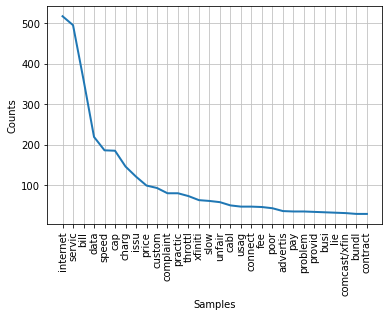

In [13]:
fd.plot(30, cumulative = False)

In [14]:
from PIL import Image # if you don't have it, you'll need to install it
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

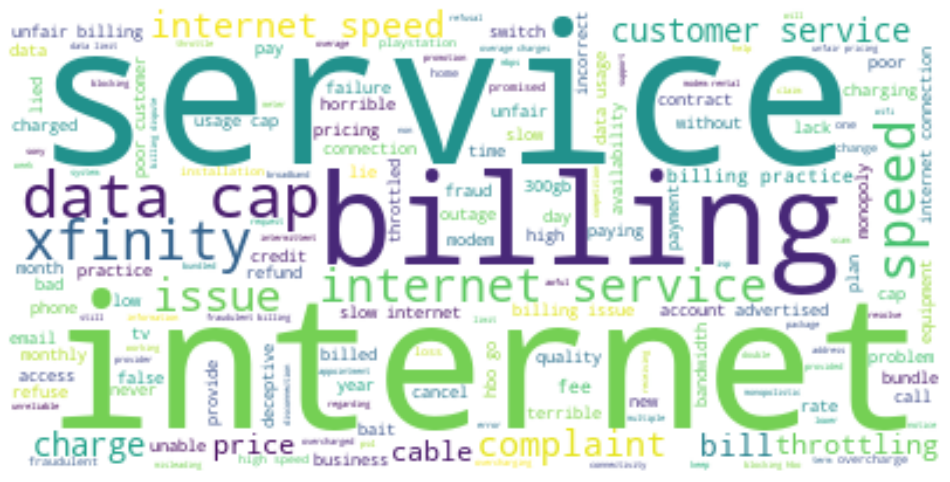

In [15]:
stopwords = set(STOPWORDS)
stopwords.update(["comcast", ",", ".", "-", "&"])
cloud = WordCloud(stopwords=stopwords, background_color='white').generate(cd)


# Display the generated image:
plt.figure(figsize=(13, 10), facecolor=None) 
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [16]:
df1 = df.drop(['Customer Complaint'], axis=1)

In [17]:
df1["Status"] = df1["Status"].replace('Solved', 'Closed')
df1["Status"] = df1["Status"].replace('Pending', 'Open')

In [18]:
df1.head(10)

,Ticket #,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,22-04-2015,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,4/8/2015,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,18-04-2015,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,5/7/2015,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,26-05-2015,1:25:26 PM,Internet,Acworth,Georgia,30101,Closed,No
5,338519,6/12/2015,9:59:40 PM,Internet,Acworth,Georgia,30101,Closed,No
6,361148,24-06-2015,10:13:55 AM,Customer Care Call,Acworth,Georgia,30101,Open,No
7,359792,23-06-2015,6:56:14 PM,Internet,Adrian,Michigan,49221,Closed,No
8,318072,6/1/2015,11:46:30 PM,Customer Care Call,Alameda,California,94502,Closed,No
9,371214,28-06-2015,6:46:31 PM,Customer Care Call,Alameda,California,94501,Open,Yes


# Data Visualization

**We will now take a look at some data visualizations perfomred on Tableau Software**

*Figure 1: Map of Complaints per city*

![Map of Complaints per city](https://i.imgur.com/PhE9acB.png)

*Figure 2: Histogram of Complaints per City*

![](https://i.imgur.com/GQrab1q.png)

*Figure 3: Map of Complaints per state*

![Map of Complains per State](https://i.imgur.com/WBkCDdo.png)

*Figure 4: Histogram of Complaints per state*

![](https://i.imgur.com/NydYhlp.png)

*Figure 5: Number of Complaints per Date*

![](https://i.imgur.com/Xij3hcD.png)

*Figure 6: Filling on Behalf, Recieved Via, Closed Status % per State, and Status count of complaints respectively*

![](https://i.imgur.com/0WdkdUD.png)

*Figure 7: Density chart of Complaints per State and Date*

![](https://i.imgur.com/V298K7A.png)

*Figure 7: Box Plot for Complaints per state*

![](https://i.imgur.com/wWsHjBj.png)